In [166]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [21]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [23]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine,reflect=True)
# reflect the tables

In [25]:
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [28]:
#with inspector get the column names
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [29]:
#with inspector get the column names
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [30]:
# We can view all of the classes that automap found
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
#last date of the database:
#2017-08-23
#so until 2016-07-23

In [126]:
#retrieve the earliest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [127]:
#subtract date from 2017-08-23
#date 365 days ago
year_ago = dt.datetime(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [128]:
results_query = session.query(Measurement.date, Measurement.prcp).all()

In [129]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Got the date using DB Browser 
# Perform a query to retrieve the data and precipitation scores

query_date = dt.date(2016,8,23)
sel = [Measurement.station, Measurement.date, Measurement.prcp]
averages = session.query(*sel).\
    filter(Measurement.date > query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(averages, columns=['Station','Date','Precipitation'])
df.head()

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


,Station,Date,Precipitation
0,USC00519397,2016-08-24,0.08
1,USC00519397,2016-08-25,0.08
2,USC00519397,2016-08-26,0.00
3,USC00519397,2016-08-27,0.00
4,USC00519397,2016-08-28,0.01


In [130]:
df.dropna(how='any')

,Station,Date,Precipitation
0,USC00519397,2016-08-24,0.08
1,USC00519397,2016-08-25,0.08
2,USC00519397,2016-08-26,0.00
3,USC00519397,2016-08-27,0.00
4,USC00519397,2016-08-28,0.01
...,...,...,...
2216,USC00516128,2017-08-17,0.13
2218,USC00516128,2017-08-19,0.09
2220,USC00516128,2017-08-21,0.56
2221,USC00516128,2017-08-22,0.50


In [131]:
df = df.sort_values(by=['Date'])
df.head()

,Station,Date,Precipitation
0,USC00519397,2016-08-24,0.08
1006,USC00517948,2016-08-24,NaN
1524,USC00519281,2016-08-24,2.15
702,USC00514830,2016-08-24,2.28
360,USC00513117,2016-08-24,2.15


In [132]:
df = df.dropna(how='any')

In [133]:
df = df.set_index('Date')

In [134]:
df.head()

,Station,Precipitation
Date,,
2016-08-24,USC00519397,0.08
2016-08-24,USC00519281,2.15
2016-08-24,USC00514830,2.28
2016-08-24,USC00513117,2.15
2016-08-24,USC00516128,1.45


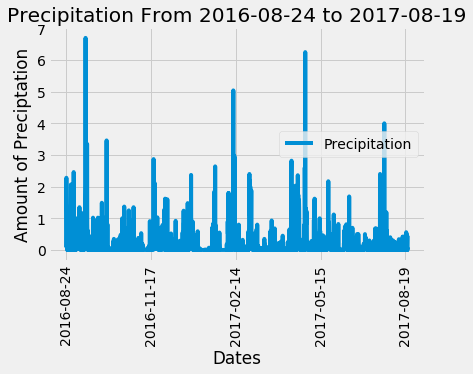

In [153]:
df.plot(y='Precipitation')
plt.title("Precipitation From 2016-08-24 to 2017-08-19")
plt.xlabel("Dates")
plt.ylabel("Amount of Preciptation")
plt.xticks(rotation=90)
plt.savefig('Saved_images/precipitation.png')

In [136]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [137]:
# Design a query to show how many stations are available in this dataset?


In [138]:
#design a query to list the number of stations 
from sqlalchemy import func
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [139]:
# What are the most active stations? (i.e. what stations have the most rows)?
#list the stations in descending order
from sqlalchemy import func
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [140]:
#testing join that works
session.query(Measurement.station, Measurement.date, Station.name).\
    join(Station, Measurement.station==Station.station).\
        filter(Measurement.station == 'USC00519281').all()

[('USC00519281', '2010-01-01', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-02', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-03', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-04', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-05', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-06', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-07', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-08', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-09', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-10', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-11', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-12', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-13', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-14', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-15', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-16', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-17', 'WAIHEE 837.5, HI US'),
 ('USC00519281', '2010-01-18', 'WAIHEE 837.5, HI US'),
 ('USC0051

In [141]:
#most active station is USC00519281
session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    filter(Measurement.station == 'USC00519281').all()

[('USC00519281', '2010-01-01', 0.15),
 ('USC00519281', '2010-01-02', 0.0),
 ('USC00519281', '2010-01-03', 0.0),
 ('USC00519281', '2010-01-04', 0.0),
 ('USC00519281', '2010-01-05', 0.0),
 ('USC00519281', '2010-01-06', 0.01),
 ('USC00519281', '2010-01-07', 0.17),
 ('USC00519281', '2010-01-08', 0.0),
 ('USC00519281', '2010-01-09', 0.0),
 ('USC00519281', '2010-01-10', 0.0),
 ('USC00519281', '2010-01-11', 0.03),
 ('USC00519281', '2010-01-12', 0.0),
 ('USC00519281', '2010-01-13', 0.0),
 ('USC00519281', '2010-01-14', 0.0),
 ('USC00519281', '2010-01-15', 0.0),
 ('USC00519281', '2010-01-16', 0.0),
 ('USC00519281', '2010-01-17', 0.0),
 ('USC00519281', '2010-01-18', 0.0),
 ('USC00519281', '2010-01-19', 0.0),
 ('USC00519281', '2010-01-20', 0.0),
 ('USC00519281', '2010-01-21', 0.16),
 ('USC00519281', '2010-01-22', 0.0),
 ('USC00519281', '2010-01-23', 0.0),
 ('USC00519281', '2010-01-24', 0.0),
 ('USC00519281', '2010-01-25', 0.0),
 ('USC00519281', '2010-01-26', 0.01),
 ('USC00519281', '2010-01-27', 0

In [143]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# Highest Temperature Recorded
session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(85.0)]

In [144]:
#Lowest temperature recorded
session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0)]

In [145]:
#Average temperature of the most active station
session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(71.66378066378067)]

In [42]:
#first date on the station
session.query(Measurement.date).\
	filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()

('2017-08-18')

In [146]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_date = dt.date(2016,8,18)
selection = [Measurement.date, Measurement.station, Measurement.tobs]
last_12_months = session.query(*selection).\
    filter(Measurement.date > query_date).\
    filter(Measurement.station == 'USC00519281').all()

In [147]:
station_df = pd.DataFrame(last_12_months, columns=['Date','Station','Weather'])
station_df

,Date,Station,Weather
0,2016-08-19,USC00519281,79.0
1,2016-08-20,USC00519281,81.0
2,2016-08-21,USC00519281,79.0
3,2016-08-22,USC00519281,78.0
4,2016-08-23,USC00519281,77.0
...,...,...,...
351,2017-08-14,USC00519281,77.0
352,2017-08-15,USC00519281,77.0
353,2017-08-16,USC00519281,76.0
354,2017-08-17,USC00519281,76.0


In [56]:
station_df = station_df.set_index('Date')

In [57]:
del station_df['Station']

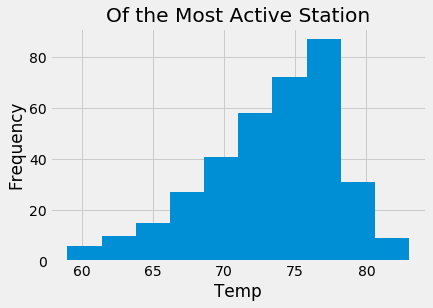

In [154]:
station_df.hist()
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.title('Of the Most Active Station')
plt.savefig('Saved_images/active_station.png')

## Bonus Challenge Assignment

## Temperature Analysis II

In [158]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
#notes session.query(func.max(Measurement.tobs)).filter(Measurement.date >= '2010-03-01').all()

In [160]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-03-13','2017-03-28'))

[(65.0, 72.90721649484536, 80.0)]


In [161]:
yerr_min = 72.907-65.0
yerr_max = 80.0 - 72.907

In [162]:
df = pd.DataFrame({'function':['avg'], 'temp':[72.90]})
df

,function,temp
0,avg,72.9


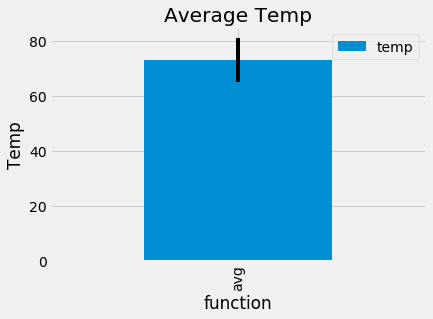

In [163]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

ax = df.plot.bar(x='function', y='temp', yerr=[[yerr_min],[yerr_max]])
plt.ylabel('Temp')
plt.title('Average Temp')
plt.savefig('Saved_images/avg_temp.png')

## Daily Rainfall Average

In [169]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

#filter by date
#groupby weather stations
#sum everything in that list
#then, sort the station through a join
query_date_start = dt.date(2017,3,13)
query_date_end = dt.date(2017,3,28)
sel = [Measurement.station,Measurement.date, Measurement.prcp]
total_rainfall = session.query(*sel).\
	filter(Measurement.date >= query_date_start).\
	filter(Measurement.date <= query_date_end).all()

In [170]:
total_rain_df = pd.DataFrame(total_rainfall, columns=['Station', 'Date', 'Precipitation'])

In [171]:
grouped_total_rain_df = total_rain_df.groupby(['Station']).sum()

In [172]:
grouped_total_rain_df

,Precipitation
Station,
USC00513117,0.95
USC00514830,0.21
USC00516128,1.36
USC00517948,0.06
USC00519281,1.35
USC00519397,0.02
USC00519523,0.87


In [173]:
selection_station = [Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
station_info = session.query(*selection_station).all()

In [174]:
station_info_df = pd.DataFrame(station_info, columns=['Id', 'Station', 'Name', 'Latitude', 'Longitude', 'Elevation'])
station_info_df

,Id,Station,Name,Latitude,Longitude,Elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [175]:
merged_station_info_df = pd.merge(station_info_df, grouped_total_rain_df, on='Station')

In [176]:
del merged_station_info_df['Id']

#### Daily Rainfall Average

In [177]:
merged_station_info_df.rename(columns={"Precipitation":"Avg_Precipitation"})

,Station,Name,Latitude,Longitude,Elevation,Avg_Precipitation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.02
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.95
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.21
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.06
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.87
5,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.35
6,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.36


In [178]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
merged_station_info_df.sort_values(by=['Precipitation'], ascending=False)

,Station,Name,Latitude,Longitude,Elevation,Precipitation
6,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.36
5,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.35
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.95
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.87
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.21
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.06
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.02


# Temperature Analysis

In [49]:
#obtain only june
#obtain only december 
#what is the difference in temperature
#use the and clause

results_june = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "06").all()

results_december = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()

In [55]:
average_hawaii_june = session.query(func.avg(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
average_hawaii_december = session.query(func.avg(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "12").all()

In [57]:
print(f'The average temperature for June in Hawaii is {average_hawaii_june}')
print(f'The average temperature for December is {average_hawaii_december}')

The average temperature for June in Hawaii is [(74.94411764705882,)]
The average temperature for December is [(71.04152933421226,)]


In [63]:
#append results in a list
june_weather_list = []
for temperature in results_june:
    june_weather_list.append(temperature.tobs)

In [66]:
december_weather_list = []
for temperature in results_december:
    december_weather_list.append(temperature.tobs)

In [71]:
#perform an unpaired T-test
#the two weather temperatures do not represent the same group
from scipy.stats import ttest_ind
from scipy import stats

In [72]:
stats.ttest_ind(june_weather_list, december_weather_list)
#The p-value indicates that there is a difference in temperature between December and June
#The difference is statistically significant. 

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

In [44]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [90]:
#now I need to figure out to append these values to a list then I can convert to a dataFrame
#notes first = daily_normals("01-01")
#notes second = daily_normals("02-01")

In [96]:
#notes
#first.append(second[0])

In [97]:
#notes
#first

[(62.0, 69.15384615384616, 77.0),
 [(56.0, 68.14035087719299, 78.0)],
 (56.0, 68.14035087719299, 78.0)]

In [ ]:
#make it a range
#then run the function
#then increase the date

#when is your trip date?
#From 2017-03-13 to 2017-03-28

In [83]:
daily_normals("01"+ "-" + str(a))

[(57.0, 67.25454545454545, 77.0)]

In [ ]:
#notes a = 13
# for i in range(16):
#     print("01"+ "-" + str(a))
#     a +=  1

In [100]:
a = 13
values_of_min_max = []
for i in range(16):
    result_normals = daily_normals("03"+"-"+str(a))
    values_of_min_max.append(result_normals[0])
    a +=1

In [101]:
values_of_min_max

[(56.0, 69.29629629629629, 77.0),
 (62.0, 70.32758620689656, 77.0),
 (58.0, 68.54716981132076, 76.0),
 (60.0, 69.70370370370371, 78.0),
 (57.0, 68.54, 75.0),
 (57.0, 67.7843137254902, 76.0),
 (60.0, 69.1, 75.0),
 (62.0, 70.11764705882354, 80.0),
 (60.0, 71.07692307692308, 77.0),
 (65.0, 71.75471698113208, 77.0),
 (63.0, 70.79629629629629, 78.0),
 (62.0, 71.5, 77.0),
 (63.0, 71.5, 78.0),
 (64.0, 71.38, 80.0),
 (63.0, 71.53846153846153, 80.0),
 (59.0, 71.51785714285714, 82.0)]

In [102]:
# now you want to set this data to a dataframe
values_of_min_max_df = pd.DataFrame(values_of_min_max, columns=['Min', 'Avg', 'Max'])
values_of_min_max_df.head()

,Min,Avg,Max
0,56.0,69.296296,77.0
1,62.0,70.327586,77.0
2,58.0,68.547170,76.0
3,60.0,69.703704,78.0
4,57.0,68.540000,75.0


In [105]:
values_of_min_max_df['Date'] = pd.date_range(start="2017-03-13",end="2017-03-28")
#https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python

In [108]:
values_of_min_max_df = values_of_min_max_df[['Date','Min','Avg','Max']]

In [109]:
#add the date to the dataframe
values_of_min_max_df = values_of_min_max_df.set_index('Date')

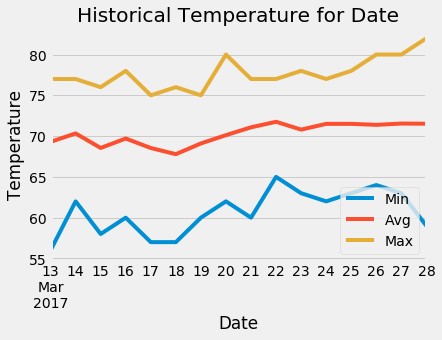

In [168]:
#https://stackoverflow.com/questions/40050597/matplotlib-plot-multiple-lines-on-the-same-chart
ax = values_of_min_max_df.plot.line()
ax.set_ylabel('Temperature')
ax.set_title('Historical Temperature for Date')
plt.savefig('Saved_images/historical_temperature.png')

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
